<a href="https://colab.research.google.com/github/romanowiczadam/ml_course/blob/master/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# sposoby radzenia sobie z brakami danych
# - usunięcie rekordów z brakami (przy dużej ilości danych)
# - uzupełnienie braków stałą wartościam (np: średnią lub medianą)
# UWAGA - obliczeń dokonujemy na zbiorze treningowym!
# - wytrenowanie modelu w celu uzupełnienia braków
# - zastosowanie interpolacji (szeregi czasowe)
# - dodanie nowej kategorii - brak

2.1_Import_bibliotek

In [49]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'0.22.2.post1'

2.2_Wygenerowanie_danych

In [5]:
data = {
    'size' : ['XL', 'L', 'M', np.nan, 'L', 'M'],
    'color' : ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender' : ['female', 'male', np.nan, 'male', 'female', 'female'],
    'price' : [199.0, 89.0, np.nan, 99.0, 129.0, 79.0],
    'weight' : [500, 450, 300, np.nan, 410, np.nan],
    'bought' : ['yes', 'no', 'yes', 'no', 'yes', 'no'],
}
print(data)

df_raw = pd.DataFrame(data=data)
print(df_raw)

{'size': ['XL', 'L', 'M', nan, 'L', 'M'], 'color': ['red', 'green', 'blue', 'green', 'red', 'green'], 'gender': ['female', 'male', nan, 'male', 'female', 'female'], 'price': [199.0, 89.0, nan, 99.0, 129.0, 79.0], 'weight': [500, 450, 300, nan, 410, nan], 'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']}
  size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN    NaN   300.0    yes
3  NaN  green    male   99.0     NaN     no
4    L    red  female  129.0   410.0    yes
5    M  green  female   79.0     NaN     no


In [7]:
df_r = df_raw.copy()
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [9]:
df_r.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,4.0,415.0,85.049005,300.0,382.5,430.0,462.5,500.0


2.3_Sprawdzenie_braków

In [10]:
df_r.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [11]:
df_r.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [12]:
df_r.isnull().sum().sum()

5

In [15]:
df_r.isnull().sum() / len(df_r)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

2.4_Uzupełnianie_braków-SimpleImputer

In [18]:
from sklearn.impute import SimpleImputer

# opcje : 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df_r[['weight']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [20]:
# obliczona wartość
imputer.statistics_

array([415.])

In [22]:
df_r['weight'] = imputer.transform(df_r[['weight']])
df_r

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,415.0,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,415.0,no


In [23]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value=99.0)
imputer.fit_transform(df_r[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [ 99.],
       [129.],
       [ 79.]])

In [24]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value='L')
imputer.fit_transform(df_r[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['L'],
       ['M']], dtype=object)

In [25]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit_transform(df_r[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['L'],
       ['M']], dtype=object)

In [26]:
# powrót do surowych danych
df_r = df_raw.copy()
df_r

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


In [30]:
# maska logiczna dla konkretnej kolumny
pd.isnull(df_r['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [32]:
# wycięcie wierszy w ktorych wystepuja braki w kolumnie weight
df_r[pd.isnull(df_r['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,male,99.0,NaN,no
5,M,green,female,79.0,NaN,no


In [33]:
# przeciwnie, zwrócenie wszytkich wierszy w któych nie ma Nan
df_r[~pd.isnull(df_r['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,L,red,female,129.0,410.0,yes


In [35]:
pd.notnull(df_r['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [36]:
df_r

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


In [37]:
# uzupełnienie wszystki braków danych
df_r.fillna(value = 'brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199,500,yes
1,L,green,male,89,450,no
2,M,blue,brak,brak,300,yes
3,brak,green,male,99,brak,no
4,L,red,female,129,410,yes
5,M,green,female,79,brak,no


In [38]:
df_r.fillna(value = 0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0,0.0,300.0,yes
3,0,green,male,99.0,0.0,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,0.0,no


In [42]:
# konkretna kolumna
df_r['size'].fillna(value = 'L', inplace = True)
# gdy inplace jest na True zmiany sa przypisany
df_r

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,male,99.0,NaN,no
4,L,red,female,129.0,410.0,yes
5,M,green,female,79.0,NaN,no


In [44]:
# metoda ta usuwa kolumny z brakami danych, ale mozna regulowac ilosc brakow
df_r.dropna()


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,L,red,female,129.0,410.0,yes


2.5_Generowanie_szeregu_czasowego

In [59]:
data = {'price' : [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start = '01-01-2020 09:00', end = '01-01-2020 18:00', periods = 10)

df_1 = pd.DataFrame(data = data, index = date_range)
df_1

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


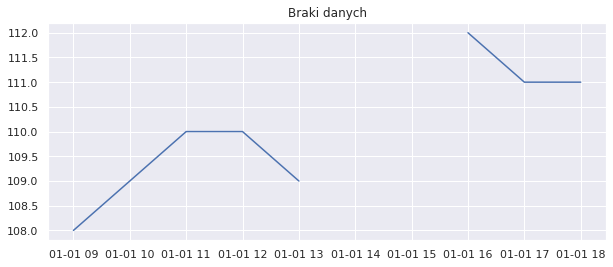

In [64]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize= (10, 4))
plt.title('Braki danych')
_ = plt.plot(df_1.price)


In [69]:
import plotly.express as px

df_1_plotly = df_1.reset_index()
px.line(df_1_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Braki danych')


In [74]:
# usunięcie braków
df_1_plotly = df_1_plotly.dropna()
px.line(df_1_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Braki danych')

In [76]:
# wstawianie 0
df_1_plotly = df_1.reset_index()
df_1_plotly['price'] = df_1_plotly['price'].fillna(0)
px.line(df_1_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Braki danych')

In [77]:
# wstawianie średniej
df_1_plotly = df_1.reset_index()
df_1_plotly['price'] = df_1_plotly['price'].fillna(df_1_plotly['price'].mean())
px.line(df_1_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Braki danych')

In [78]:
# interpolacja
df_1_plotly = df_1.reset_index()
df_1_plotly['price'] = df_1_plotly['price'].interpolate()
px.line(df_1_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Braki danych')

In [79]:
# metoda - forwar fill - wstawianie poprzedniej wartosci
df_1_plotly = df_1.reset_index()
df_1_plotly['price'] = df_1_plotly['price'].fillna(method = 'ffill')
px.line(df_1_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Braki danych')

In [80]:
# metoda - backward fill - wstawianie poprzedniej wartosci 'od tylu'
df_1_plotly = df_1.reset_index()
df_1_plotly['price'] = df_1_plotly['price'].fillna(method = 'bfill')
px.line(df_1_plotly, 'index', 'price', width = 600, height = 400,
        title = 'Braki danych')